In [1]:
import pandas as pd
import numpy as np
import re
import string
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sb

!pip install wordcloud
from wordcloud import WordCloud

!pip install nltk
import nltk
!pip install gensim
import gensim
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer, word_tokenize
from nltk import ngrams
from nltk.util import ngrams
from gensim.models.phrases import Phrases
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
!pip install spacy
import spacy
!python -m spacy download en_core_web_sm

'''
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
'''
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2024-01-07 10:38:42.560911: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 10:38:42.560972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 10:38:42.562173: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 10:38:43.601776: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
%cd '/content/drive/MyDrive/ColabNotebooks/sa'

/content/drive/.shortcut-targets-by-id/1ZGVlZAZNRfLUzGfgrqbMkyrWY9QKQfBI/sa


In [ ]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

# Data Visualization

In [ ]:
df_train.head()

,id,polarity,text
0,t1,negative,"vineet, what you are tri to do is a terribl id..."
1,t2,positive,"cours i do, corrected."
2,t3,positive,"excellent, happi to help! if you don't mind, c..."
3,t6,negative,<@user> i'm use it a few dozen time in my clas...
4,t7,neutral,i didn't select an answer becaus even though t...


In [ ]:
df_test.head()

,id,text
0,t4,@DrabJay: excellent suggestion! Code changed. :-)
1,t5,Any decent browser should protect against mali...
2,t8,I swear - I don't put pseudo code I get told o...
3,t9,I have attached below
4,t13,When I refactor the following line: using Resh...


In [ ]:
df_train['polarity'].value_counts()

neutral     1186
positive    1069
negative     842
Name: polarity, dtype: int64

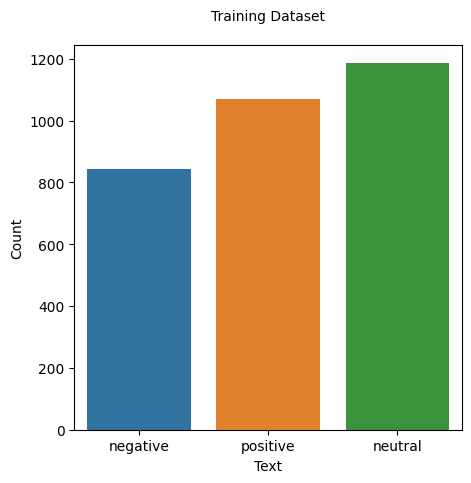

In [ ]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.countplot(data=df_train, x='polarity', hue='polarity')
plt.title("Training Dataset\n", fontsize=10)
plt.xlabel('Text')
plt.ylabel("Count")
plt.show()

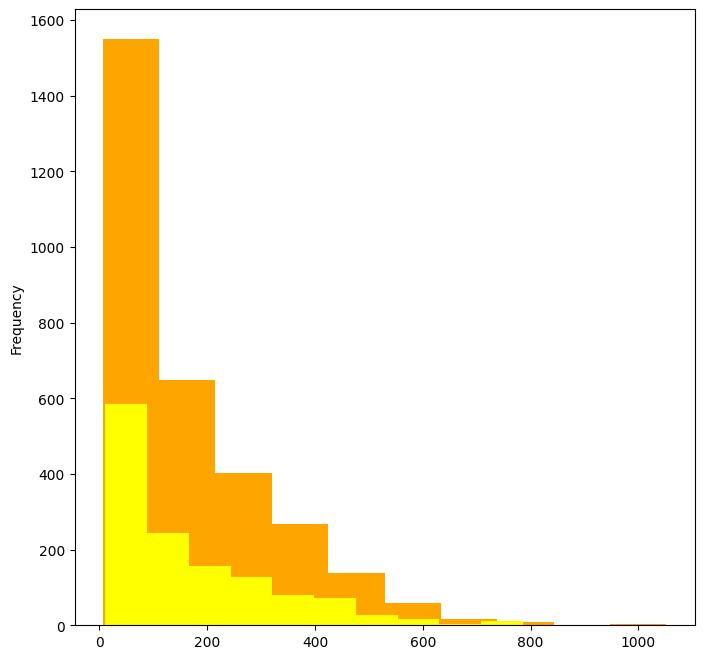

In [ ]:
train_data_len = df_train['text'].str.len().plot.hist(color = 'orange' , figsize = (8,8))
test_data_len = df_test['text'].str.len().plot.hist(color = 'yellow' , figsize = (8,8))

# Data Pre-Processing

In [ ]:
dataset_type = "none"

def cleaning_text(text):
  text = re.sub(r'@[a-zA-Z0-9_]+', '<@user>', text)
  text = re.sub(r'http\S+', '<link>', text)
  text = re.sub(r'www\S+', '<link>', text)
  text = text.encode('ascii', 'ignore').decode('ascii')

  #stop_words = set(stopwords.words('english'))
  #text = [word for word in text.split() if (word not in stop_words and word not in string.punctuation)]

  #return ' '.join(text)
  return text


# input 's' for stemming, 'l' for lemmatization
def preprocessing(text, procedure):
  global dataset_type
  if procedure == 's':
    dataset_type = "stemming"
    text = text.split()
    stemmer = SnowballStemmer("english")
    text = [stemmer.stem(word) for word in text]

  elif procedure == 'l':
    dataset_type = "lemmatization"
    load_model = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])
    doc = load_model(text)
    text = [token.lemma_ for token in doc]

  return ' '.join(text)

# Preprocess the training text
X_clean_train = df_train['text'].apply(cleaning_text)
df_train['text'] = X_clean_train.apply(preprocessing, procedure='s')
X_train = df_train['text']
y_train = df_train['polarity']

# Preprocess the testing text
X_clean_test = df_test['text'].apply(cleaning_text)
df_test['text'] = X_clean_test.apply(preprocessing, procedure='s')


In [ ]:
print(dataset_type)

stemming


In [ ]:
# HO SISTEMATO FINO QUI
from pathlib import Path
filepath = Path('dataset/train_preprocessed_' + dataset_type + '.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_train.to_csv(filepath)

In [ ]:
for i in range(len(df_train)):
  print(df_train['text'][i])

vineet, tri terribl idea! if ever find engin someth fundament that, take step back work els it! i realli believ whole spoon fed so thing, mtwebster say right track!
cours i do, corrected.
excellent, happi help! if mind, accept answer?
<@user> i'm use dozen time class. it heavi write, easi read pain debug. i'm sorry, i think question subjective, mayb someon move programmers!?
i select answer even though two help neither complete.
this tomcat 5.5
paraphras cypher, "stateof.confus bliss", so... do `mapcollect items` state? if singl `itemstatus` everi `item` references. [`application.properties`](<link> may way global communic visualness.
excellent! thank persever :)
wow, i'v look corona sdk. it look excellent! a realli intuit way build apps. thank tip!
a seem proprietary.
to push heroku, add repo. whi want commit it? it recommend commit gemfile.lock repo (unless develop gem): when develop app, check gemfile.lock, sinc use bundler tool across machines, precis enforc bundler extrem desir ap

In [ ]:
for i in range(len(df_test)):
  print(df_test['text'][i])

<@user>: excel suggestion! code changed. :-)
ani decent browser protect malici code imag i think worry. if truli concern use combin getimagesize() see use clamav extension/program scan file malici code. noth perfect though.
i swear i put pseudo code i get told bad variabl name thing match... i put pseudocod i still get grief!
i attach
when i refactor follow line: use resharp "use object initializer", i get following: i realli hate type format longer object name variabl get control. how i get resharp following?
that i thought, that i'm surpris
i want resiz base length data they'r showing.
is possibl (or desirable?!) set behav like for example, instead write can't i write similarly, instead
didn't notic horrid inlin jquery, remov it! then open browser consol (f12) check errors.
<@user> actual need. i append one letter end vowel con table. <@user> my great pleasur see code helpful!
do jqueri load correctly?
<@user>: `impredicativetypes` make monad bind polymorph well (though requir heck l

In [ ]:
df = pd.read_csv('dataset/train_preprocessed.csv')
df = df.drop(['Unnamed: 0'], axis=1)

filepath = Path('dataset/train_preprocessed.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

df_preprocessed = df
df_preprocessed.head()

,id,polarity,text
0,t1,negative,"vineet, tri terribl idea! if ever find engin s..."
1,t2,positive,"cours i do, corrected."
2,t3,positive,"excellent, happi help! if mind, accept answer?"
3,t6,negative,<@user> i'm use dozen time class. it heavi wri...
4,t7,neutral,i select answer even though two help neither c...


In [ ]:
df_se = pd.read_csv('dataset/output.csv', sep='\t', names=['id', 'positive', 'negative', 'neutral'])
df_se = pd.DataFrame(df_se)

df_se['id'] = df_se['id'].apply(lambda x: re.search(r't(\d+)', x).group(0) if re.search(r't(\d+)', x) is not None else '')

df_se[['frst', 'scnd', 'thrd']] = df_se['positive'].str.split(expand=True)
df_se[['frst', 'scnd', 'thrd']] = df_se[['frst', 'scnd', 'thrd']].apply(pd.to_numeric)

df_se = df_se.drop(['positive'], axis=1)
df_se = df_se.drop(['negative'], axis=1)
df_se = df_se.drop(['neutral'], axis=1)

df_se = df_se.rename(columns={'frst': 'pos'})
df_se = df_se.rename(columns={'scnd': 'neg'})
df_se = df_se.rename(columns={'thrd': 'neu'})

print(df_se)

         id  pos  neg  neu
0              1   -1    0
1        t1    1   -1    0
2        t2    1   -1    0
3        t3    3   -1    1
4        t6    1   -4   -1
...     ...  ...  ...  ...
3093  t4416    1   -1    0
3094  t4417    1   -1    0
3095  t4419    1   -1    0
3096  t4421    1   -3   -1
3097  t4423    1   -1    0

[3098 rows x 4 columns]


In [ ]:
df_train = pd.merge(df_preprocessed, df_se, on='id', how='left')
df_train['sum'] = df_train['pos'] + df_train['neg'] + df_train['neu']
print(df_train.head())
df_train.to_csv('train_preprocessed_se.csv', index=False)

   id  polarity                                               text  pos  neg  \
0  t1  negative  vineet, tri terribl idea! if ever find engin s...    1   -1   
1  t2  positive                             cours i do, corrected.    1   -1   
2  t3  positive     excellent, happi help! if mind, accept answer?    3   -1   
3  t6  negative  <@user> i'm use dozen time class. it heavi wri...    1   -4   
4  t7   neutral  i select answer even though two help neither c...    1   -1   

   neu  
0    0  
1    0  
2    1  
3   -1  
4    0  


# Structural feature extraction

In [ ]:
import re
EMOTICONS = r'''
    (?x)
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      </?3                       # heart
    '''

def count(df):
    exclamation_freq = []
    question_freq = []
    uppercase_freq = []
    word_count = []
    character_count = []
    emoticon_count = []
    for i in range(len(df)):
        words = len(df['text'][i].split())
        chars = len(df['text'][i])
        exclamation_freq.append(sum(1 for c in df['text'][i] if c == '!') / words)
        question_freq.append(sum(1 for c in df['text'][i] if c == '?') / words)
        uppercase_freq.append(sum(1 for c in df['text'][i] if c.isupper()) / chars)
        word_count.append(words)
        character_count.append(chars)
        emoticon_count.append(len(re.findall(EMOTICONS, df['text'][i])))

    df['exclamation_freq'] = exclamation_freq
    df['question_freq'] = question_freq
    df['uppercase_freq'] = uppercase_freq
    df['word_count'] = word_count
    df['char_count'] = character_count
    df['emoticon_count'] = emoticon_count

In [ ]:
df = pd.read_csv('../dataset/train_labelled_lemmas_new.csv')
count(df)
df.head()

In [ ]:
df.to_csv('../dataset/train_labelled_lemmas_count_sum_emot.csv', index=False)